In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

# Q1.

Text(0.5, 1.0, 'Newspaper')

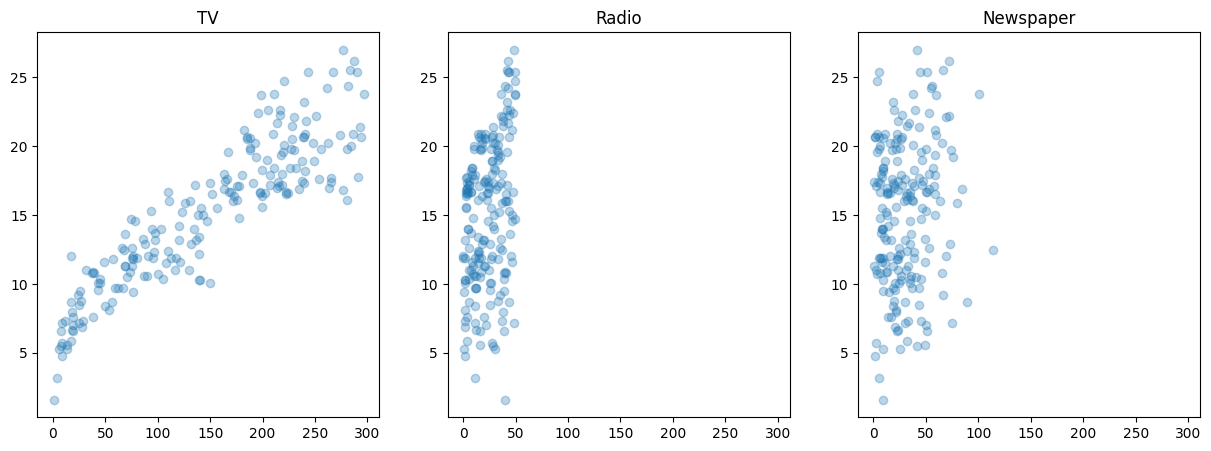

In [104]:
df = pd.read_csv("advertising.csv")
# df.plot()

fig,(fig1,fig2,fig3) = plt.subplots(1,3,figsize = (15,5), sharex=True)
fig1.scatter(df["TV"],df["Sales"],alpha=0.3)
fig1.set_title("TV")
fig2.scatter(df["Radio"],df["Sales"],alpha=0.3)
fig2.set_title("Radio")
fig3.scatter(df["Newspaper"],df["Sales"],alpha=0.3)
fig3.set_title("Newspaper")
# plt.scatter(df["Sales"],df["TV"],alpha=0.1)


In [13]:
def regression_coefficient(x,y):

    # x_t=x.transpose()
    # x_tx=np.matmul(x_t,x)
    # x_tx_inv=np.linalg.inv(x_tx)
    # x_tx_invx_t=np.matmul(x_tx_inv,x_t)
    # coeff=np.matmul(x_tx_invx_t,y)

    coeff = np.linalg.inv(x.T @ x) @ x.T @ y
    
    return coeff



## 1.1 Without Data Normalization

[0.06707876 0.16003288 0.02843349]


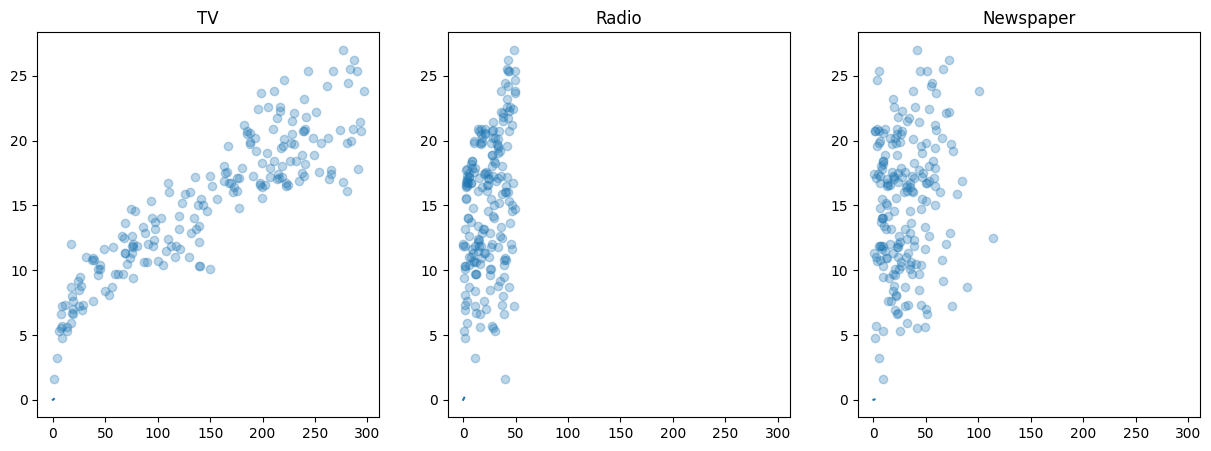

In [105]:
df_x=df.drop(["Sales"],axis=1)
# df_x["ones"] = [1.0 for i in range(200)]
# regression_coefficient(np.array(df_x),np.array(df["Sales"]))

data_with_1_col = np.concatenate([np.array([[1] for i in range(len(df_x))]) , np.array(df_x)],axis = 1)
simple_reg_coeffs = regression_coefficient(np.array(df_x),np.array(df["Sales"]))

# reg = LinearRegression()

# reg.fit(data_with_1_col,np.array(df["Sales"]))
# simple_reg_coeffs = reg.coef_


print(simple_reg_coeffs)

# fig,(fig1,fig2,fig3) = plt.subplots(1,3,figsize = (15,5), sharex=True)
# fig1.scatter(df["TV"],df["Sales"],alpha=0.3)
# fig1.set_title("TV")
# fig1.plot([i/100 for i in range(100)],[0 + i/100*simple_reg_coeffs[0] for i in range(100)])
# fig2.scatter(df["Radio"],df["Sales"],alpha=0.3)
# fig2.set_title("Radio")
# fig2.plot([i/100 for i in range(100)],[0 + i/100*simple_reg_coeffs[1] for i in range(100)])
# fig3.scatter(df["Newspaper"],df["Sales"],alpha=0.3)
# fig3.set_title("Newspaper")
# fig3.plot([i/100 for i in range(100)],[0 + i/100*simple_reg_coeffs[2] for i in range(100)])

Text(0.5, 0, 'Newspaper')

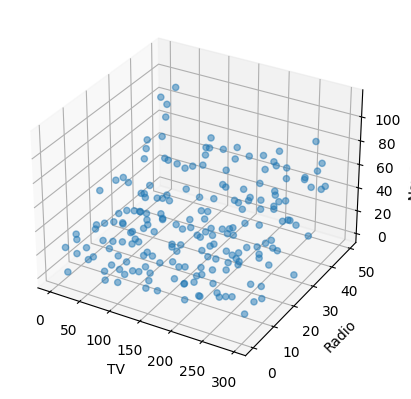

In [110]:
# view = TSNE(n_components=3, random_state=0).fit_transform(df_x)

fig = plt.figure()
ax = fig.add_subplot(projection ="3d")
# ax.scatter3D(view[:,0], view[:,1] , alpha=0.5)
ax.scatter3D(df["TV"],df["Radio"],df["Newspaper"], alpha=0.5)
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Newspaper')

In [111]:
x = data_with_1_col
y = np.array(df["Sales"])
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=42)

In [84]:
def ridge_regression_coefficient(x,y,lb=0.1):

    # x_t=x.transpose()
    # x_tx=np.matmul(x_t,x)
    
    idt=np.identity(len(x[0]))
    idt=idt*lb
    idt[0][0] = 0
    # idt[len(x[0])-1][len(x[0])-1]=0
    
    # x_tx_plus_lmbdaI = x_tx + idt
    
    # x_tx_inv=np.linalg.inv(x_tx_plus_lmbdaI)
    # x_tx_invx_t=np.matmul(x_tx_inv,x_t)
    # coeff=np.matmul(x_tx_invx_t,y)

    coeff = np.linalg.inv((x.T @ x) + idt) @ x.T @ y
    
    return coeff





In [113]:
coefficients = ridge_regression_coefficient(x_train,y_train,1)

y_pred_train = x_train @ coefficients.T
train_error = sum((y_train - y_pred_train)**2)

y_pred_test = x_test @ coefficients.T
test_error = sum((y_test - y_pred_test)**2)

print("training error : ",train_error)
print("Test error : ",test_error)

training error :  397.4925728932088
Test error :  152.49870622648479


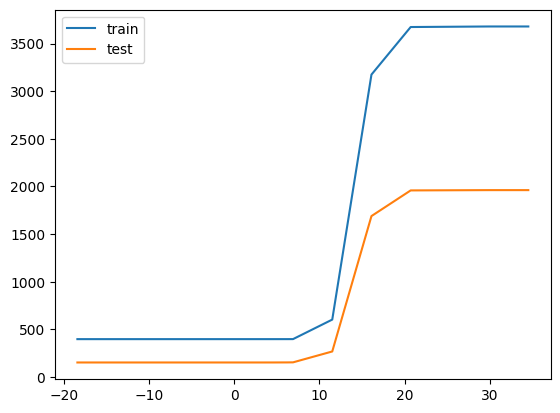

In [128]:
train_errorlist=[]
test_errorlist=[]
lambdalist = [1e-8,1e-3,1e-2,1,5,10,20,30,35,40,100,500,1000,1e5,1e7,1e9,1e13,1e15]
ln_lmb=[]

for i in lambdalist:
    cff = ridge_regression_coefficient(x_train, y_train,i)
    
    y_pred_train = x_train @ cff.T
    train_error = sum((y_train - y_pred_train)**2)
    train_errorlist.append(train_error)

    y_pred_test = x_test @ cff.T
    test_error = sum((y_test - y_pred_test)**2)
    test_errorlist.append(test_error)

    ln_lmb.append(np.log(i)) 

plt.plot(ln_lmb,train_errorlist,label="train")
plt.plot(ln_lmb,test_errorlist,label="test")
plt.legend()

## 1.2 With Data Normalization & Standardization

Text(0.5, 1.0, 'Newspaper')

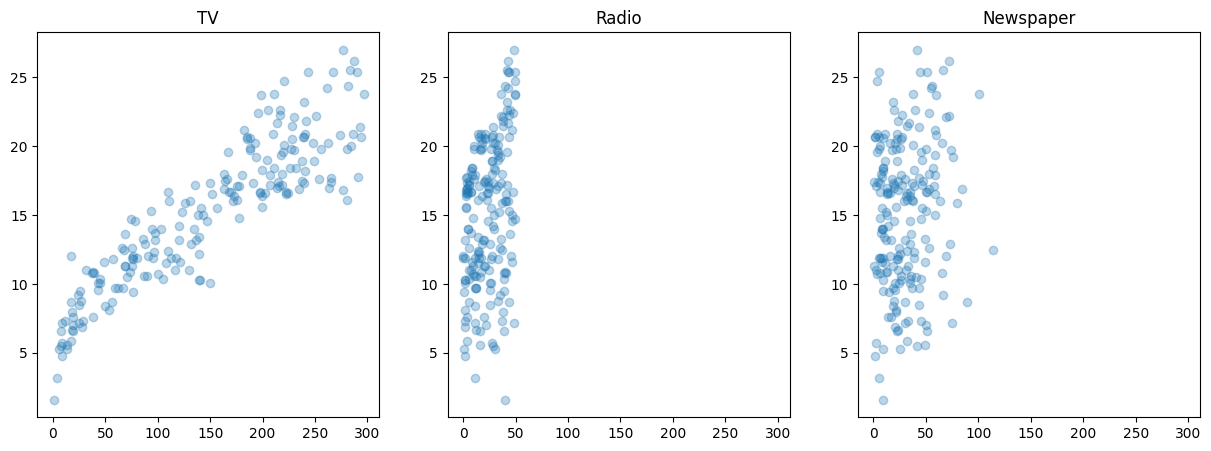

In [115]:
df_normalized = df.copy()
for column in df.columns: 
    df_normalized[column] = (df_normalized[column] - df_normalized[column].min()) / (df_normalized[column].max() - df_normalized[column].min())

fig,(fig1,fig2,fig3) = plt.subplots(1,3,figsize = (15,5), sharex=True)
fig1.scatter(df["TV"],df["Sales"],alpha=0.3)
fig1.set_title("TV")
fig2.scatter(df["Radio"],df["Sales"],alpha=0.3)
fig2.set_title("Radio")
fig3.scatter(df["Newspaper"],df["Sales"],alpha=0.3)
fig3.set_title("Newspaper")

Text(0.5, 0, 'Newspaper')

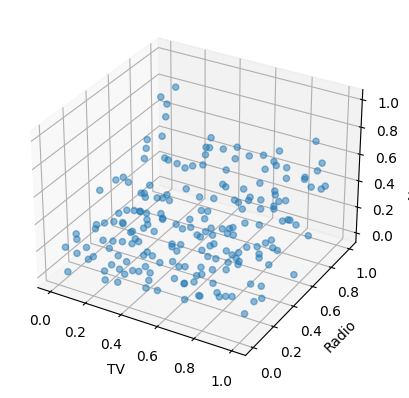

In [116]:
fig = plt.figure()
ax = fig.add_subplot(projection ="3d")
# ax.scatter3D(view[:,0], view[:,1] , alpha=0.5)
ax.scatter3D(df_normalized["TV"],df_normalized["Radio"],df_normalized["Newspaper"], alpha=0.5)
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Newspaper')

In [121]:
df_x_norm = df_normalized.drop(["Sales"],axis=1)
data_with_1_col_normalized = np.concatenate([np.array([[1] for i in range(len(df_x_norm))]) , np.array(df_x_norm)],axis = 1)
x_norm = data_with_1_col_normalized
y_norm = np.array(df["Sales"])
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split( x_norm, y_norm, test_size=0.30, random_state=42)

In [122]:
coefficients = ridge_regression_coefficient(x_train_norm,y_train_norm,1)

y_pred_train_norm = x_train_norm @ coefficients.T
train_error = sum((y_train_norm - y_pred_train_norm)**2)

y_pred_test_norm = x_test_norm @ coefficients.T
test_error = sum((y_test_norm - y_pred_test_norm)**2)

print("training error : ",train_error)
print("Test error : ",test_error)

training error :  417.640566721394
Test error :  175.57694372280858


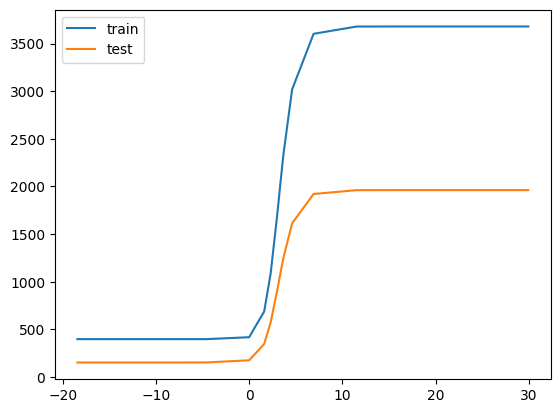

In [127]:
train_errorlist=[]
test_errorlist=[]
lambdalist = [1e-8,1e-3,1e-2,1,5,10,20,30,35,40,100,1000,1e5,1e7,1e9,1e11,1e13]
ln_lmb=[]

for i in lambdalist:
    cff = ridge_regression_coefficient(x_train_norm, y_train_norm,i)
    
    y_pred_train = x_train_norm @ cff.T
    train_error = sum((y_train_norm - y_pred_train)**2)
    train_errorlist.append(train_error)

    y_pred_test = x_test_norm @ cff.T
    test_error = sum((y_test_norm - y_pred_test)**2)
    test_errorlist.append(test_error)

    ln_lmb.append(np.log(i)) 

plt.plot(ln_lmb,train_errorlist,label="train")
plt.plot(ln_lmb,test_errorlist,label="test")
plt.legend()

# Q2. Logistic Regression

#### Data split

In [366]:
df = pd.read_csv("banknote_authentication.csv")

In [367]:
x = df.drop("class",axis=1)
y = df["class"]
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=42)

#### Function for logistic regression model

In [36]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def logistic_reg_model(x,y,eta,iter):
    m = x.shape[1]
    n = x.shape[0]

    w = np.zeros(m)
    b=0

    for i in range(iter):
        z= x @ w + b
        A=sigmoid(z)

        # cost = -(1/m)*np.sum( y*np.log(A) + (1-y)*np.log(1-A))
        # if(i%100==0):
        #     print("cost",cost)
        dw = (1/m)*np.dot(x.T , A-y)
        db = (1/m)*np.sum(A-y)

        w = w - eta*dw.T
        b = b - eta*db

    return b,w

In [12]:
# np.array(x_train)
# z=np.dot(x_train , np.array([[1,2,3,4]]).T) + 2
# A=sigmoid(z)
# A

In [39]:
# bias,weights = logistic_reg_model(np.array(x_train),np.array(y_train),0.001,1000)

# print(weights @ x_train.T + bias)


In [38]:
lr = 0.001
iterations = 1000

bias,weights = logistic_reg_model(np.array(x_train),np.array(y_train),lr,iterations)


##  training error
y_pred = weights @ np.array(x_train).T + bias
y_pred_classification = [0 if i<0.5 else 1 for i in y_pred]

training_acc = accuracy_score(y_pred_classification,y_train)
print("training accuracy : ",training_acc)

## testing error
y_pred = weights @ np.array(x_test).T + bias
y_pred_classification = [0 if i<0.5 else 1 for i in y_pred]

testing_acc = accuracy_score(y_pred_classification,y_test)
print("testing accuracy : ",testing_acc)



training accuracy :  0.9895833333333334
testing accuracy :  0.9902912621359223


# Q3. Understanding Bias Variance Trade off 

#### Data entry , Reversal of data , converting date-time

In [2]:
df = pd.read_excel('Apple_stock_data.xlsx', index_col=None) 

df["Close/Last"] = pd.to_numeric(df["Close/Last"].replace('[^0-9\.-]','',regex=True))
df["Volume"] = pd.to_numeric(df["Volume"].replace('[^0-9\.-]','',regex=True))
df["Open"] = pd.to_numeric(df["Open"].replace('[^0-9\.-]','',regex=True))
df["High"] = pd.to_numeric(df["High"].replace('[^0-9\.-]','',regex=True))
df["Low"] = pd.to_numeric(df["Low"].replace('[^0-9\.-]','',regex=True))
cols = list(df.columns)
cols

['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']

In [3]:
df=df[::-1]
df

Date  Close/Last       Volume      Open      High  \
2515  2013-02-10 00:00:00     17.4843  287196445.0   17.3439   17.5643   
2514  2013-03-10 00:00:00     17.2646  315209314.0   17.5182   17.5839   
2513  2013-04-10 00:00:00     17.2511  258552177.0   17.2807   17.3071   
2512  2013-07-10 00:00:00     17.4196  311556715.0   17.3771   17.5946   
2511  2013-08-10 00:00:00     17.1764  289041924.0   17.4979   17.5229   
...                   ...         ...          ...       ...       ...   
4              09/25/2023    176.0800   46172740.0  174.2000  176.9700   
3              09/26/2023    171.9600   64588950.0  174.8200  175.2000   
2              09/27/2023    170.4300   66921810.0  172.6200  173.0400   
1              09/28/2023    170.6900   56294420.0  169.3400  172.0300   
0              09/29/2023    171.2100   51861080.0  172.0200  173.0700   

           Low  
2515   17.2768  
2514   17.1692  
2513   17.0929  
2512   17.3339  
2511   17.1621  
...        ...  
4     174.1500  
3     171.6600  
2     169.0500  
1     167.6200  
0     170.3410  

[2516 rows x 6 columns]

In [4]:
df["Date"] = pd.to_datetime(df["Date"])
df

Date  Close/Last       Volume      Open      High       Low
2515 2013-02-10     17.4843  287196445.0   17.3439   17.5643   17.2768
2514 2013-03-10     17.2646  315209314.0   17.5182   17.5839   17.1692
2513 2013-04-10     17.2511  258552177.0   17.2807   17.3071   17.0929
2512 2013-07-10     17.4196  311556715.0   17.3771   17.5946   17.3339
2511 2013-08-10     17.1764  289041924.0   17.4979   17.5229   17.1621
...         ...         ...          ...       ...       ...       ...
4    2023-09-25    176.0800   46172740.0  174.2000  176.9700  174.1500
3    2023-09-26    171.9600   64588950.0  174.8200  175.2000  171.6600
2    2023-09-27    170.4300   66921810.0  172.6200  173.0400  169.0500
1    2023-09-28    170.6900   56294420.0  169.3400  172.0300  167.6200
0    2023-09-29    171.2100   51861080.0  172.0200  173.0700  170.3410

[2516 rows x 6 columns]

#### Plotting all columns in DataFrame plot

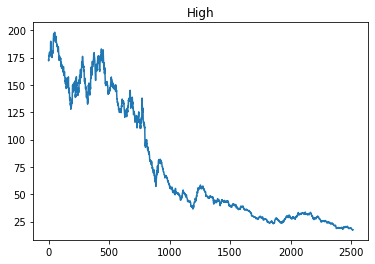

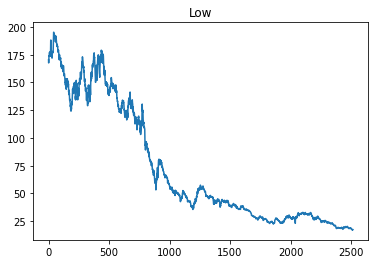

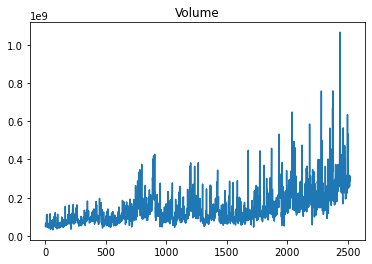

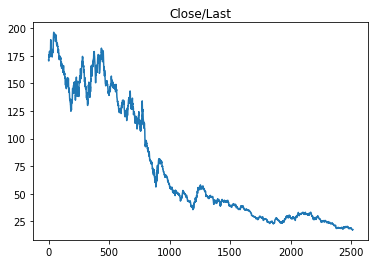

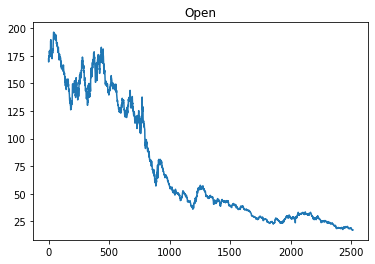

In [5]:
# fig,axs = plt.subplots(1,3,figsize=(20,10))

fig1=df["High"].plot(alpha=1)
fig1.set_title("High")
plt.show()

fig2=df["Low"].plot(alpha=1)
fig2.set_title("Low")
plt.show()

fig3=df["Volume"].plot(alpha=1)
fig3.set_title("Volume")
plt.show()

fig3=df["Close/Last"].plot(alpha=1)
fig3.set_title("Close/Last")
plt.show()

fig3=df["Open"].plot(alpha=1)
fig3.set_title("Open")
plt.show()

#### Scatter Plot for all columns according to date

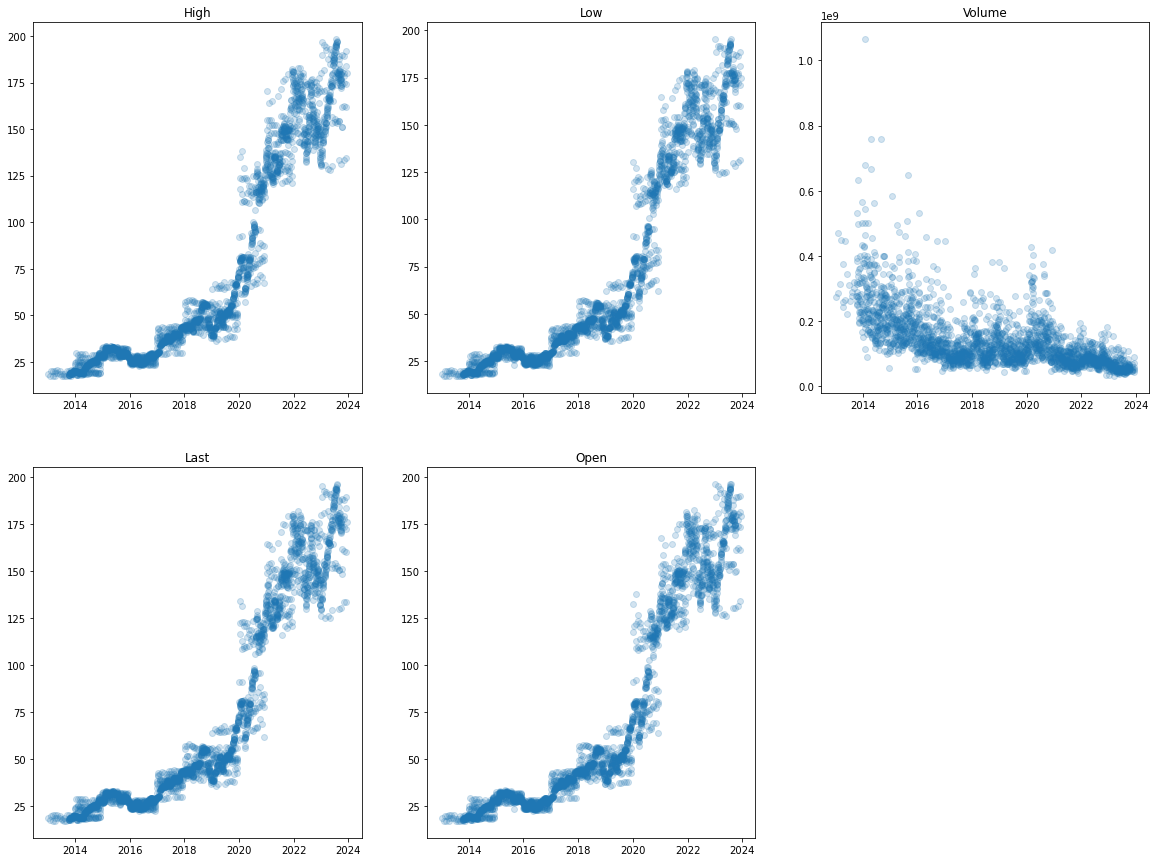

In [6]:
fig,((p1,p2,p3),(p4,p5,p6)) = plt.subplots(2,3,figsize=(20,15))

st='o'

p1.plot_date(df["Date"],df["High"],alpha=0.2,marker=st)
p1.set_title("High")
p2.plot_date(df["Date"],df["Low"],alpha=0.2,marker=st)
p2.set_title("Low")
p3.plot_date(df["Date"],df["Volume"],alpha=0.2,marker=st)
p3.set_title("Volume")
p4.plot_date(df["Date"],df["Close/Last"],alpha=0.2,marker=st)
p4.set_title("Last")
p5.plot_date(df["Date"],df["Open"],alpha=0.2,marker=st)
p5.set_title("Open")

p6.set_visible(False)


#### Splitting Data into training and testing

In [7]:
train_data = df[df["Date"] <'2023']
test_data = df[df["Date"] >='2023']

In [8]:
# def time_series_model()

Text(0, 0.5, 'Correlation coefficient')

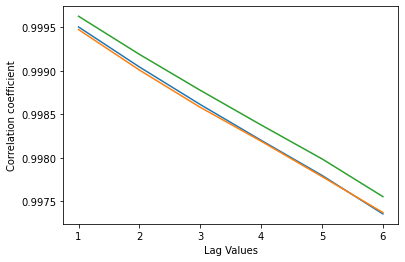

In [9]:
l_lag_value=[i for i in range(1,7)]
xx=['Close/Last', 'Volume', 'Open', 'High', 'Low']
l_corr={i:[] for i in ['Close/Last', 'Volume', 'Open', 'High', 'Low']}

for i in l_lag_value:
    df_lag=df.shift(i)
    for c in ['Close/Last', 'Volume', 'Open', 'High', 'Low']:
#         print(df[c])
        co=df[c].corr(df_lag[c])
        l_corr[c].append(co)
    
#     print("Correlation between given dataset and generated dataset is",co)
#     plt.scatter(df["new_cases"][1:],df_lag["new_cases"][1:])
#     plt.xlabel("Original Data")
#     plt.ylabel("One Day lag")
#     plt.show()

plt.plot(l_lag_value,l_corr[xx[0]])
# plt.plot(l_lag_value,l_corr[xx[1]])
plt.plot(l_lag_value,l_corr[xx[2]])
plt.plot(l_lag_value,l_corr[xx[3]])
plt.xlabel("Lag Values")
plt.ylabel("Correlation coefficient")

#### Function for Auto Regression Model

In [10]:
def generate_lag(df,col_name,lag):
    x = pd.DataFrame()
    x[col_name]=df[col_name]
    for i in range(1,lag+1):
        x[col_name+"Lag"+str(i)]=x[col_name].shift(i)
    return x[lag:]

In [11]:
def generate_polynomial(x,p):
    cs = list(x.columns)
    for j in cs:
        for i in range(2,p+1):
            x[j+"Poly"+str(i)] = x[j]**i
    return x

In [18]:
## For High column

x = generate_polynomial( generate_lag(train_data,"High",5) , 5)
x = np.array(x[:-1])
y = train_data["High"].shift(-6)[:-6]
y=np.array(y)

coeff = regression_coefficient(x,y)

x = generate_polynomial( generate_lag(test_data,"High",5) , 5)
x = np.array(x[:-1])
y = test_data["High"].shift(-6)[:-6]
y=np.array(y)
y_pred = x @ coeff.T



err = 0
for i in range(len(y_pred)):
    err+=(y_pred[i]-y[i])**2
print((err**0.5)/len(y_pred))

0.18386298452801747


#### Plotting Predicted and Actual for all columns for diffirent values of lag and polynomial 

Close/Last
Close/Last Lag = 5 p = 1  0.16858985453130623
Close/Last Lag = 10 p = 1  0.17202413835459462
Close/Last Lag = 15 p = 1  0.17491654289519734
Close/Last Lag = 5 p = 2  0.16807794274028245
Close/Last Lag = 10 p = 2  0.1738960215967086
Close/Last Lag = 15 p = 2  0.17661786836005505
Close/Last Lag = 5 p = 3  0.17300366428183292
Close/Last Lag = 10 p = 3  0.17931425894567965
Close/Last Lag = 15 p = 3  0.18693125526214263
Volume
Volume Lag = 5 p = 1  1264736.1799593205
Volume Lag = 10 p = 1  1264525.2035724919
Volume Lag = 15 p = 1  1290572.3694981402
Volume Lag = 5 p = 2  1321984.463883037
Volume Lag = 10 p = 2  1308967.675834291
Volume Lag = 15 p = 2  1337338.1324271488
Volume Lag = 5 p = 3  1300252.9912049242
Volume Lag = 10 p = 3  1283894.1674636349
Volume Lag = 15 p = 3  1335170.6639720644
Open
Open Lag = 5 p = 1  0.17466386217411486
Open Lag = 10 p = 1  0.17729724439895808
Open Lag = 15 p = 1  0.1813029725423275
Open Lag = 5 p = 2  0.1756143041016455
Open Lag = 10 p = 2  0.17

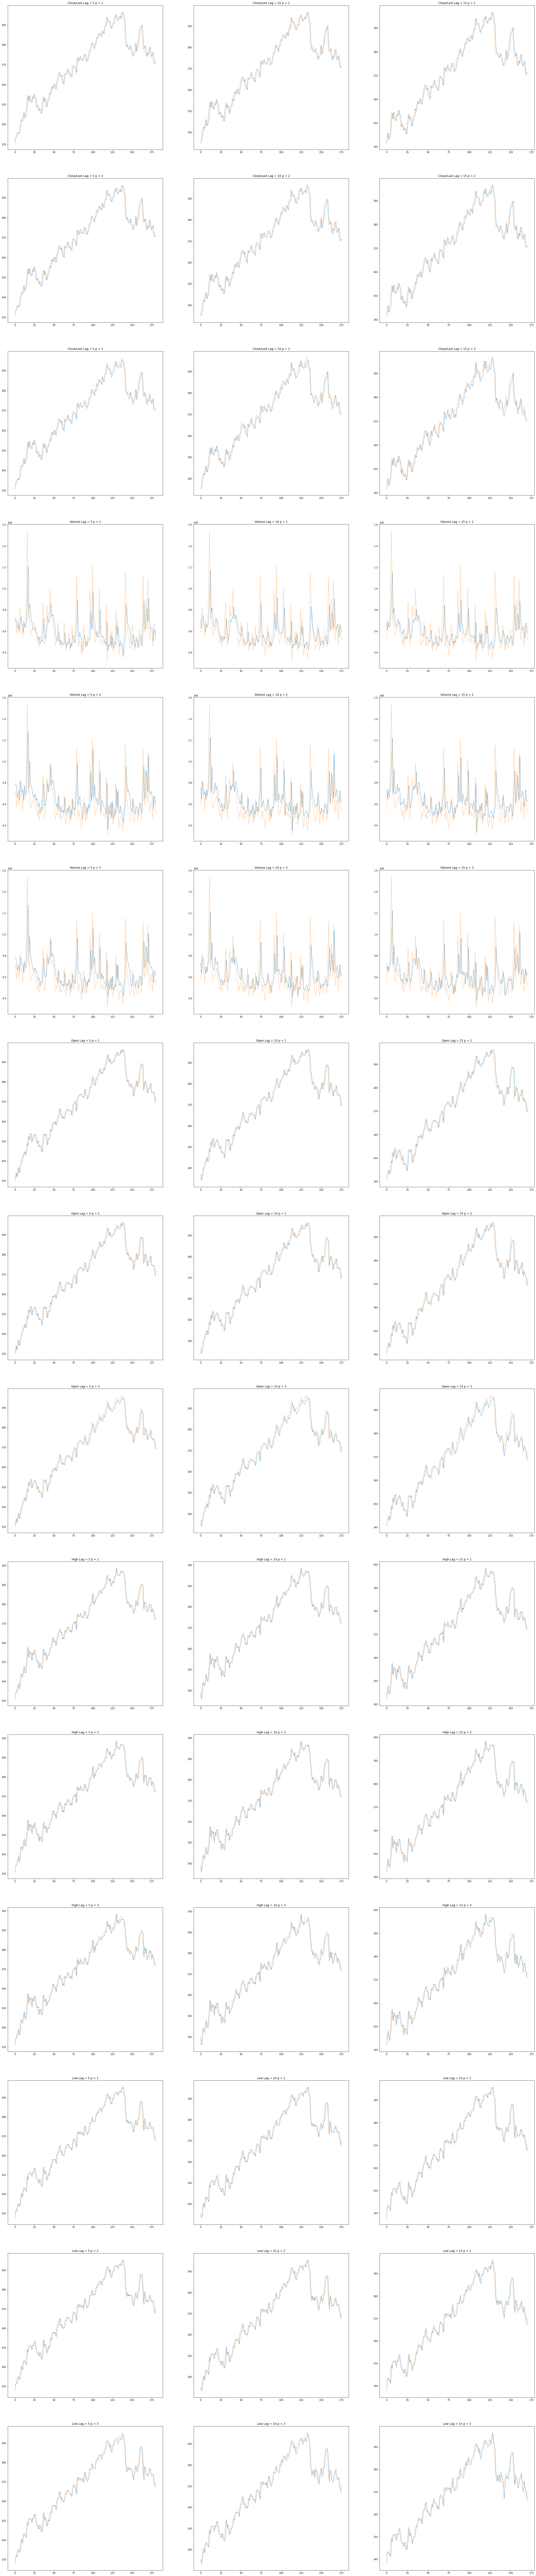

In [23]:
n = len(df)

l_p = [1,2,3]
l_k = [5,10,15]
fig, axs = plt.subplots(15,3,figsize=(40,200))

i=0
j=0
for cc in cols[1:6]:
    print(cc)
    
    for pp in l_p:
        
        for kk in l_k:
            x = generate_polynomial(generate_lag(train_data,cc,kk) , pp)  ####   Training 
            x = np.array(x[:-1])
            y = train_data[cc].shift(-kk-1)[:-kk-1]
            y=np.array(y)

            coeff = regression_coefficient(x,y)
            
            x = generate_polynomial( generate_lag(test_data,cc,kk) , pp)    #### applying on test Data
            x = np.array(x[:-1])
            y = test_data[cc].shift(-kk-1)[:-kk-1]
            y=np.array(y)
            y_pred = x @ coeff.T

            
            axs[(i+j)//4][(i+j)%4].plot([i for i in range(len(y_pred))],y_pred,linestyle = '--',alpha=0.8)
            axs[(i+j)//4][(i+j)%4].plot([i for i in range(len(y_pred))],y,alpha = 0.4)
            axs[(i+j)//4][(i+j)%4].set_title(cc+" Lag = "+str(kk)+" p = "+str(pp))
            
            err = 0
            for ll in range(len(y_pred)):
                err+=(y_pred[ll]-y[ll])**2
            print(cc+" Lag = "+str(kk)+" p = "+str(pp)+" ",(err**0.5)/len(y_pred))
            
            j+=1
        i+=1
            





#### Plotting RMSE vs lag for all columns

1
2
3
4
5


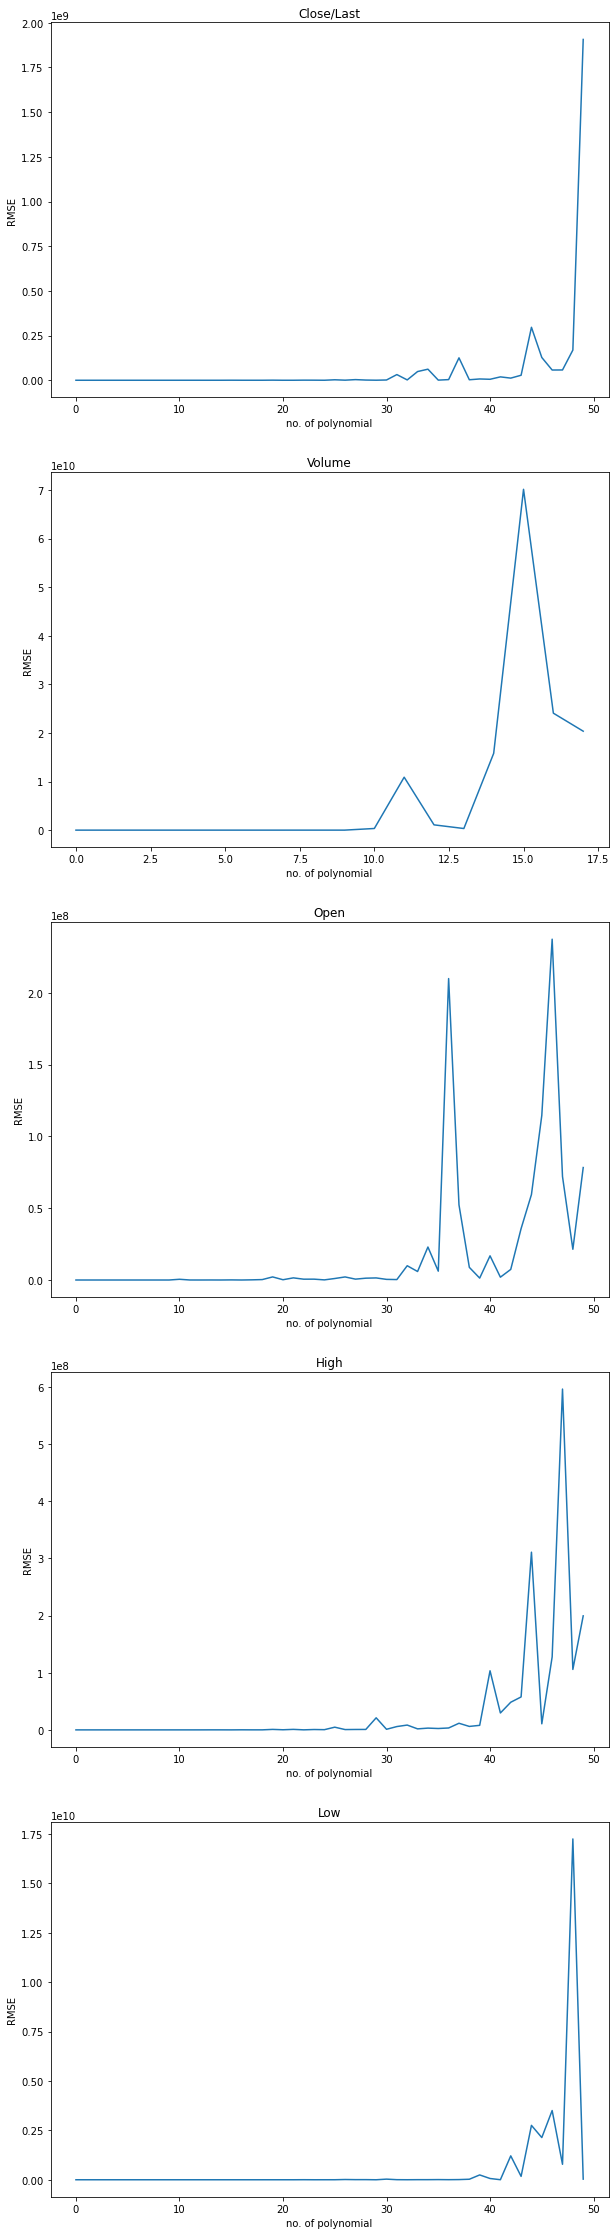

In [28]:
n = len(df)


fig, axs = plt.subplots(5,figsize=(10,40))

kk=3



for cc in range(1,6):
    print(cc)
    l_err=[]    
    for pp in range(50):  
        
        x = generate_polynomial(generate_lag(train_data,cols[cc],kk) , pp)
        x = np.array(x[:-1])
        y = train_data[cols[cc]].shift(-kk-1)[:-kk-1]
        y=np.array(y)

        coeff = regression_coefficient(x,y)
        
        x = generate_polynomial( generate_lag(test_data,cols[cc],kk) , pp)
        x = np.array(x[:-1])
        y = test_data[cols[cc]].shift(-kk-1)[:-kk-1]
        y=np.array(y)

        y_pred = x @ coeff.T
        
        
        err = 0
        for ll in range(len(y_pred)):
            err+=(y_pred[ll]-y[ll])**2
#         l_err.append(err)
        l_err.append((err**0.5)/len(y_pred))

    axs[cc-1].plot([i for i in range(50)],l_err)
    axs[cc-1].set_xlabel("no. of polynomial")
    axs[cc-1].set_ylabel("RMSE")
    axs[cc-1].set_title(cols[cc])


# plt.show()

#### Plotting RMSE vs order of Polynomial for all columns

1
2
3
4
5


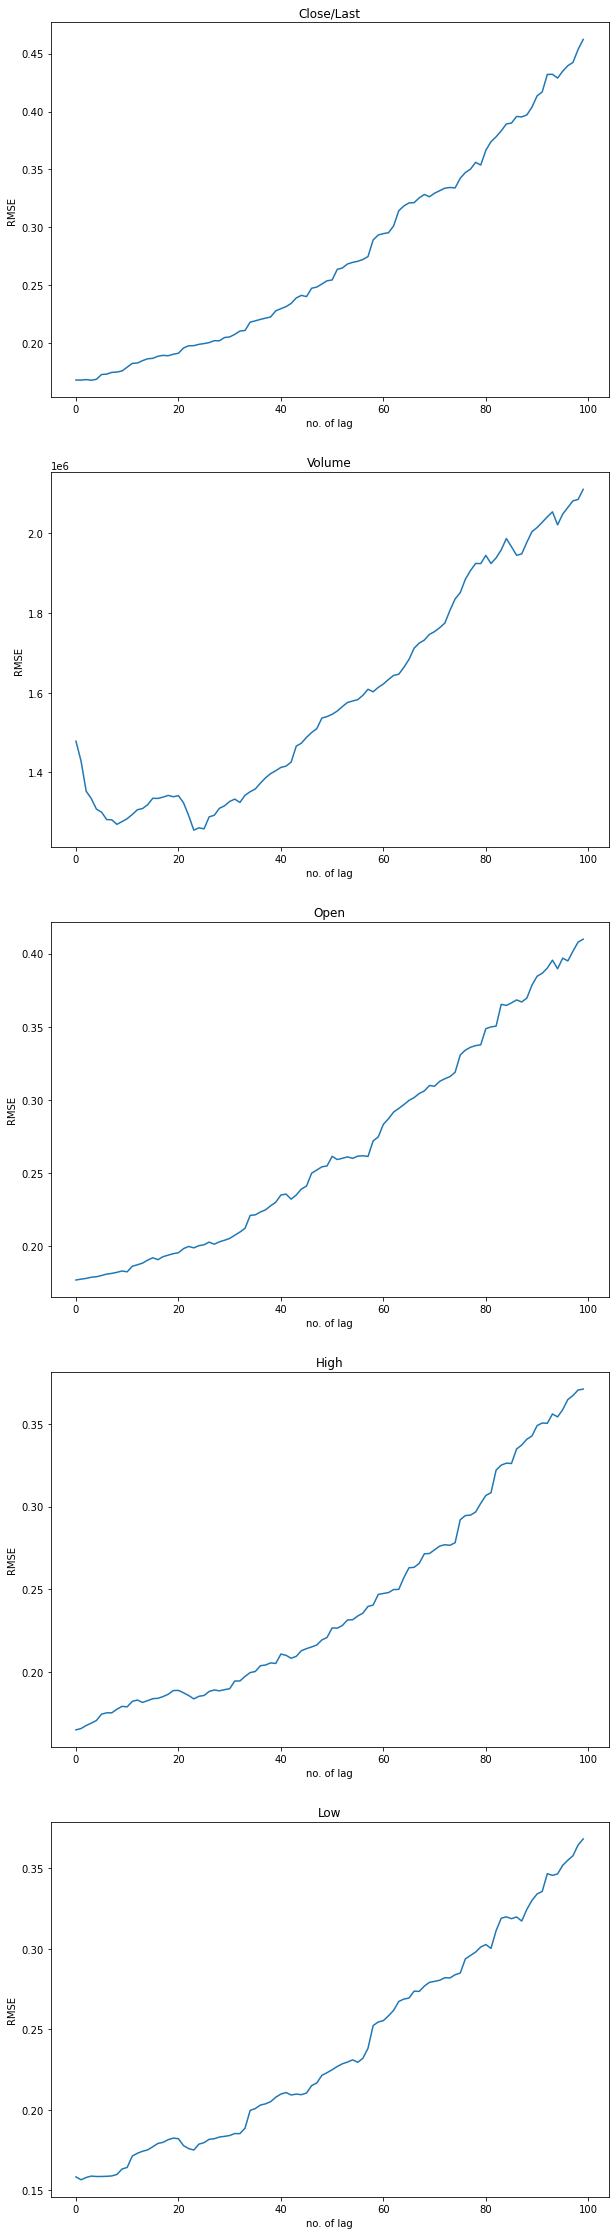

In [29]:
n = len(df)


fig, axs = plt.subplots(5,figsize=(10,40))

pp=3



for cc in range(1,6):
    print(cc)
    l_err=[]    
    for kk in range(100):  
        
        x = generate_polynomial(generate_lag(train_data,cols[cc],kk) , pp)
        x = np.array(x[:-1])
        y = train_data[cols[cc]].shift(-kk-1)[:-kk-1]
        y=np.array(y)

        coeff = regression_coefficient(x,y)
        
        x = generate_polynomial( generate_lag(test_data,cols[cc],kk) , pp)
        x = np.array(x[:-1])
        y = test_data[cols[cc]].shift(-kk-1)[:-kk-1]
        y=np.array(y)

        y_pred = x @ coeff.T
        
        
        err = 0
        for ll in range(len(y_pred)):
            err+=(y_pred[ll]-y[ll])**2
#         l_err.append(err)
        l_err.append((err**0.5)/len(y_pred))

    axs[cc-1].plot([i for i in range(100)],l_err)
    axs[cc-1].set_xlabel("no. of lag")
    axs[cc-1].set_ylabel("RMSE")
    axs[cc-1].set_title(cols[cc])
    


## 3D plotting

In [30]:
lim = 10
l_lag = [i for i in range(lim)]
l_poly = [i for i in range(lim)]

l_err = []
for pp in l_poly:        
    for kk in l_lag:
        x = generate_polynomial(generate_lag(df,"High",kk) , pp)
        x = np.array(x[:-1])
        y = df["High"].shift(-kk-1)[:-kk-1]
        y=np.array(y)

        coeff = regression_coefficient(x,y)
        
        x = generate_polynomial( generate_lag(test_data,"High",kk) , pp)
        x = np.array(x[:-1])
        y = test_data["High"].shift(-kk-1)[:-kk-1]
        y=np.array(y)

        y_pred = x @ coeff.T

        err = 0
        for ll in range(len(y_pred)):
            err+=(y_pred[ll]-y[ll])**2
        err=err/len(y_pred)
        l_err.append(err.round(3))

height_values = l_err

In [31]:
l_err = np.array(l_err)
z=np.resize(l_err,(lim,lim))

l_lag = np.array(l_lag)
l_poly = np.array(l_poly)

x,y = np.meshgrid(l_lag,l_poly)

Text(0.5, 0, 'error')

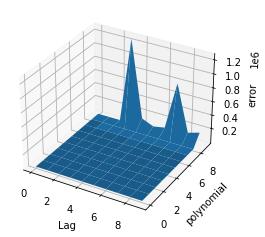

In [33]:
ax = plt.axes(projection="3d")

ax.plot_surface(x,y,z)
ax.set_xlabel("Lag")
ax.set_ylabel("polynomial")
ax.set_zlabel("error")